In [1]:
import glob
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

### CAM.h0

In [2]:
ds = xr.open_dataset("/projects/0/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/atm/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.cam2.h0.2092-12.nc")           

Text(0.5, 1.0, 'hyam, hyai, hybm, hybi')

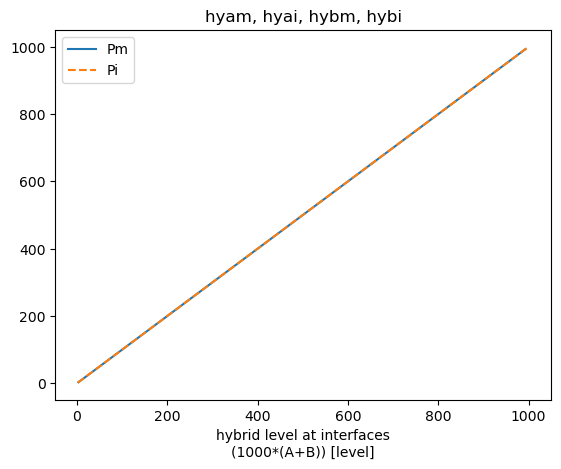

In [7]:
(ds.hyam * 1000 + ds.hybm * 1000).plot(label='Pm', linestyle='-')
(ds.hyai * 1000 + ds.hybi * 1000).plot(label='Pi', linestyle='--')
plt.legend()
plt.title('hyam, hyai, hybm, hybi')

In [20]:
for v in ['datesec','ndbase', 'nsbase', 'nbsec', 'nscur']:
    print(v, ds[v].shape, ds[v].long_name)

datesec (1,) current seconds of current date
ndbase () base day
nsbase () seconds of base day
nbsec () seconds of base date
nscur (1,) current seconds of current day


ABSORB ('time', 'lev', 'lat', 'lon') 
 {'mdims': 1, 'units': '/m', 'long_name': 'Aerosol absorption', 'cell_methods': 'time: mean'}
1.0


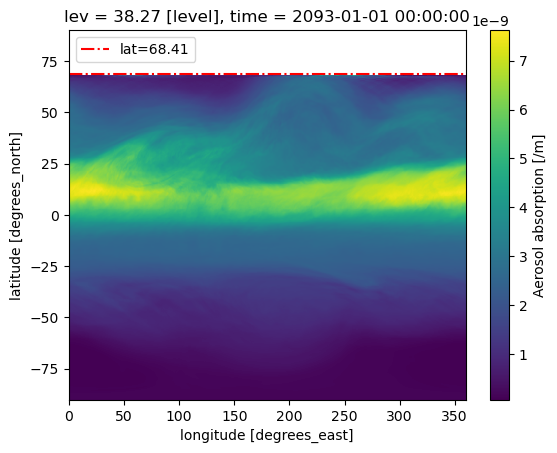

In [73]:
V = 'ABSORB'
VS = ds[V].isel(lat=slice(675,None))
VS.isnull().sum().values/VS.size
ds[V].isel(lev=4).plot()
hl = plt.gca().axhline(ds.lat[675], ls='-.', c='r', label=f'lat={hl.get_ydata()[0].data:.2f}')
plt.legend(loc='upper left')#
print(V, VS.dims, '\n', VS.attrs)
print(VS.isnull().sum().data/VS.size)

AEROD_v ('time', 'lat', 'lon') 
 {'units': '1', 'long_name': 'Total Aerosol Optical Depth in visible band', 'cell_methods': 'time: mean'}
1.0


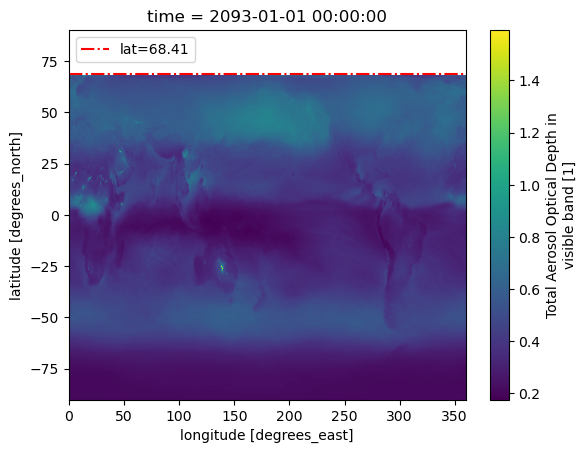

In [74]:
V = 'AEROD_v'
VS = ds[V].isel(lat=slice(675,None))
VS.isnull().sum().values/VS.size
ds[V].plot()
hl = plt.gca().axhline(ds.lat[675], ls='-.', c='r', label=f'lat={hl.get_ydata()[0].data:.2f}')
plt.legend(loc='upper left')#
print(V, VS.dims, '\n', VS.attrs)
print(VS.isnull().sum().data/VS.size)

ANRAIN ('time', 'lev', 'lat', 'lon') 
 {'mdims': 1, 'units': 'm-3', 'long_name': 'Average rain number conc', 'cell_methods': 'time: mean'}
0.0


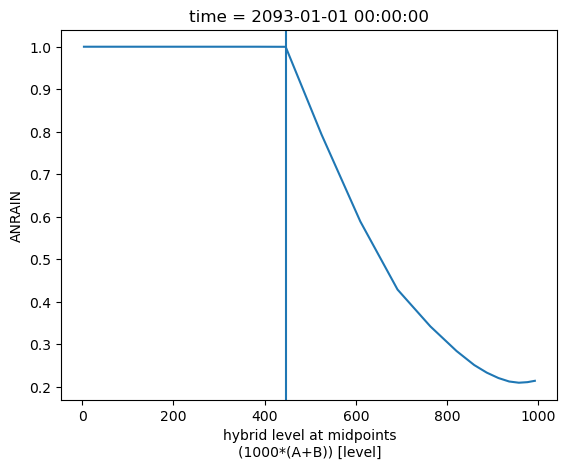

In [91]:
V = 'ANRAIN'
((ds[V]==0).sum(('lat','lon'))/xr.ones_like(ds[V]).sum(('lat','lon'))).plot()
vl = plt.axvline(ds.lev[17])
print(V, ds[V].dims, '\n', ds[V].attrs)
print(ds[V].isnull().sum().data/ds[V].size)

ANSNOW ('time', 'lev', 'lat', 'lon') 
 {'mdims': 1, 'units': 'm-3', 'long_name': 'Average snow number conc', 'cell_methods': 'time: mean'}
0.0


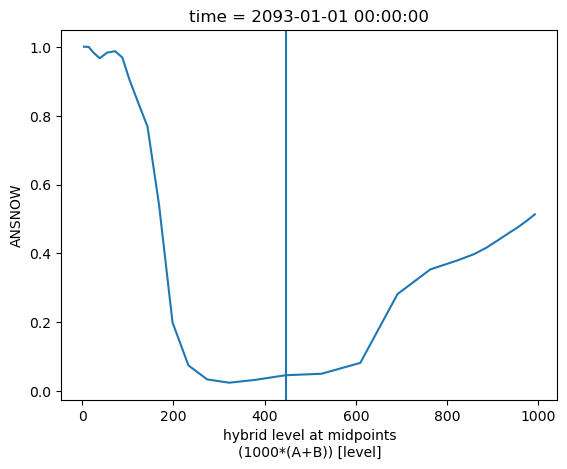

In [92]:
V = 'ANSNOW'
((ds[V]==0).sum(('lat','lon'))/xr.ones_like(ds[V]).sum(('lat','lon'))).plot()
vl = plt.axvline(ds.lev[17])
print(V, ds[V].dims, '\n', ds[V].attrs)
print(ds[V].isnull().sum().data/ds[V].size)

In [101]:
dsi = ds.isel(lat=slice(675,None))
mylist = []
for v in dsi.variables:
    perc = dsi[v].isnull().sum().data/dsi[v].size*100
    print(v.ljust(16), perc)
    if perc == 100:
        mylist.append(v)
print(mylist)

lev              0.0
hyam             0.0
hybm             0.0
ilev             0.0
hyai             0.0
hybi             0.0
P0               0.0
time             0.0
date             0.0
datesec          0.0
lat              0.0
lon              0.0
slat             0.0
slon             0.0
w_stag           0.0
time_bnds        0.0
date_written     0.0
time_written     0.0
ntrm             0.0
ntrn             0.0
ntrk             0.0
ndbase           0.0
nsbase           0.0
nbdate           0.0
nbsec            0.0
mdt              0.0
nlon             0.0
wnummax          0.0
gw               0.0
ndcur            0.0
nscur            0.0
co2vmr           0.0
ch4vmr           0.0
n2ovmr           0.0
f11vmr           0.0
f12vmr           0.0
sol_tsi          0.0
nsteph           0.0
ABSORB           100.0
AEROD_v          100.0
ANRAIN           0.0
ANSNOW           0.0
AODABS           100.0
AODDUST1         100.0
AODDUST2         100.0
AODDUST3         100.0
AODMODE1         100.0

In [105]:
# All missing values from 68.4N northward
for v in mylist:
    print(v, ds[v].shape, ds[v].long_name)

ABSORB (1, 30, 768, 1152) Aerosol absorption
AEROD_v (1, 768, 1152) Total Aerosol Optical Depth in visible band
AODABS (1, 768, 1152) Aerosol absorption optical depth 550 nm
AODDUST1 (1, 768, 1152) Aerosol optical depth 550 nm model 1 from dust
AODDUST2 (1, 768, 1152) Aerosol optical depth 550 nm model 2 from dust
AODDUST3 (1, 768, 1152) Aerosol optical depth 550 nm model 3 from dust
AODMODE1 (1, 768, 1152) Aerosol optical depth 550 nm mode 1
AODMODE2 (1, 768, 1152) Aerosol optical depth 550 nm mode 2
AODMODE3 (1, 768, 1152) Aerosol optical depth 550 nm mode 3
AODVIS (1, 768, 1152) Aerosol optical depth 550 nm
BURDEN1 (1, 768, 1152) Aerosol burden mode 1
BURDEN2 (1, 768, 1152) Aerosol burden mode 2
BURDEN3 (1, 768, 1152) Aerosol burden mode 3
EXTINCT (1, 30, 768, 1152) Aerosol extinction
SSAVIS (1, 768, 1152) Aerosol singel-scatter albedo
TOT_CLD_VISTAU (1, 30, 768, 1152) Total gbx cloud extinction visible sw optical depth
TOT_ICLD_VISTAU (1, 30, 768, 1152) Total in-cloud extinction vi

In [108]:
# all zero
for v in ds.variables:
    if (ds[v]==0).sum()==ds[v].size:
        print(v, ds[v].dims, ds[v].long_name)

datesec ('time',) current seconds of current date
ndbase () base day
nsbase () seconds of base day
nbsec () seconds of base date
nscur ('time',) current seconds of current day
DSTODXC ('time', 'lat', 'lon') Optical depth for diagnostics
DSTSFDRY ('time', 'lat', 'lon') Dry deposition flux at surface
DSTSFWET ('time', 'lat', 'lon') Wet deposition flux at surface
ORO ('time', 'lat', 'lon') ORO
SFCLDICE ('time', 'lat', 'lon') CLDICE surface flux
SFCLDLIQ ('time', 'lat', 'lon') CLDLIQ surface flux
SFNUMICE ('time', 'lat', 'lon') NUMICE surface flux
SFNUMLIQ ('time', 'lat', 'lon') NUMLIQ surface flux
SSTODXC ('time', 'lat', 'lon') Optical depth for diagnostics
SSTSFDRY ('time', 'lat', 'lon') Dry deposition flux at surface
SSTSFWET ('time', 'lat', 'lon') Wet deposition flux at surface


In [110]:
ds.close()

### cam h0 next month

In [111]:
ds = xr.open_dataset("/projects/0/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/atm/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.cam2.h0.2093-01.nc")  

In [123]:
dsi = ds.isel(lat=slice(693,None))
mylist = []
for v in dsi.variables:
    perc = dsi[v].isnull().sum().data/dsi[v].size*100
    print(v.ljust(16), perc)
    if perc == 100:
        mylist.append(v)
print(mylist)

lev              0.0
hyam             0.0
hybm             0.0
ilev             0.0
hyai             0.0
hybi             0.0
P0               0.0
time             0.0
date             0.0
datesec          0.0
lat              0.0
lon              0.0
slat             0.0
slon             0.0
w_stag           0.0
time_bnds        0.0
date_written     0.0
time_written     0.0
ntrm             0.0
ntrn             0.0
ntrk             0.0
ndbase           0.0
nsbase           0.0
nbdate           0.0
nbsec            0.0
mdt              0.0
nlon             0.0
wnummax          0.0
gw               0.0
ndcur            0.0
nscur            0.0
co2vmr           0.0
ch4vmr           0.0
n2ovmr           0.0
f11vmr           0.0
f12vmr           0.0
sol_tsi          0.0
nsteph           0.0
ABSORB           100.0
AEROD_v          100.0
ANRAIN           0.0
ANSNOW           0.0
AODABS           100.0
AODDUST1         100.0
AODDUST2         100.0
AODDUST3         100.0
AODMODE1         100.0

In [124]:
# All missing values from 68.4N northward
for v in mylist:
    print(v, ds[v].shape, ds[v].long_name)

ABSORB (1, 30, 768, 1152) Aerosol absorption
AEROD_v (1, 768, 1152) Total Aerosol Optical Depth in visible band
AODABS (1, 768, 1152) Aerosol absorption optical depth 550 nm
AODDUST1 (1, 768, 1152) Aerosol optical depth 550 nm model 1 from dust
AODDUST2 (1, 768, 1152) Aerosol optical depth 550 nm model 2 from dust
AODDUST3 (1, 768, 1152) Aerosol optical depth 550 nm model 3 from dust
AODMODE1 (1, 768, 1152) Aerosol optical depth 550 nm mode 1
AODMODE2 (1, 768, 1152) Aerosol optical depth 550 nm mode 2
AODMODE3 (1, 768, 1152) Aerosol optical depth 550 nm mode 3
AODVIS (1, 768, 1152) Aerosol optical depth 550 nm
BURDEN1 (1, 768, 1152) Aerosol burden mode 1
BURDEN2 (1, 768, 1152) Aerosol burden mode 2
BURDEN3 (1, 768, 1152) Aerosol burden mode 3
EXTINCT (1, 30, 768, 1152) Aerosol extinction
SSAVIS (1, 768, 1152) Aerosol singel-scatter albedo
TOT_CLD_VISTAU (1, 30, 768, 1152) Total gbx cloud extinction visible sw optical depth
TOT_ICLD_VISTAU (1, 30, 768, 1152) Total in-cloud extinction vi

In [125]:
# all zero
for v in ds.variables:
    if (ds[v]==0).sum()==ds[v].size:
        print(v, ds[v].dims, ds[v].long_name)

datesec ('time',) current seconds of current date
ndbase () base day
nsbase () seconds of base day
nbsec () seconds of base date
nscur ('time',) current seconds of current day
DSTODXC ('time', 'lat', 'lon') Optical depth for diagnostics
DSTSFDRY ('time', 'lat', 'lon') Dry deposition flux at surface
DSTSFWET ('time', 'lat', 'lon') Wet deposition flux at surface
ORO ('time', 'lat', 'lon') ORO
SFCLDICE ('time', 'lat', 'lon') CLDICE surface flux
SFCLDLIQ ('time', 'lat', 'lon') CLDLIQ surface flux
SFNUMICE ('time', 'lat', 'lon') NUMICE surface flux
SFNUMLIQ ('time', 'lat', 'lon') NUMLIQ surface flux
SSTODXC ('time', 'lat', 'lon') Optical depth for diagnostics
SSTSFDRY ('time', 'lat', 'lon') Dry deposition flux at surface
SSTSFWET ('time', 'lat', 'lon') Wet deposition flux at surface


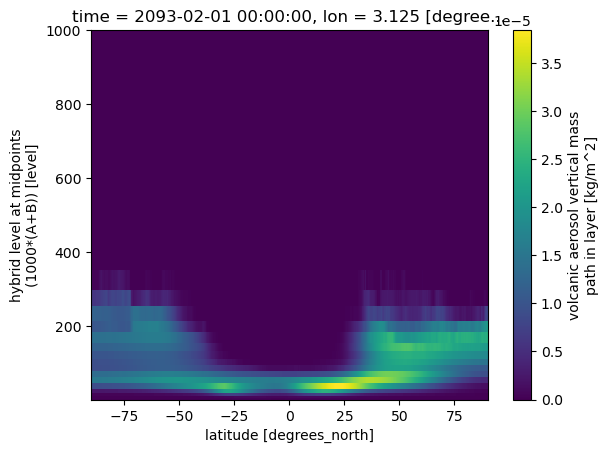

In [129]:
ds.VOLC_MASS.isel(lon=10).plot()

### cam h3

In [2]:
ds=xr.open_dataset("/home/jasperdj/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/atm/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.cam2.h3.2092-12-01-21600.nc")

In [5]:
(ds.PRECT==0).sum(('lat','lon'))/xr.ones_like(ds.PRECT).sum(('lat','lon'))

<xarray.DataArray 'PRECT' (time: 146)> Size: 1kB
array([0.04511515, 0.04441664, 0.04595495, 0.04624882, 0.04854103,
       0.04890837, 0.04998779, 0.0501709 , 0.04672128, 0.04179552,
       0.03831425, 0.03585024, 0.03562419, 0.03470075, 0.03599718,
       0.03824305, 0.03857648, 0.03652728, 0.03502062, 0.03387677,
       0.03602996, 0.03796952, 0.04068558, 0.04156946, 0.04115013,
       0.04059629, 0.03934959, 0.03741116, 0.03591015, 0.03407909,
       0.03595762, 0.03630122, 0.03379652, 0.03326642, 0.03418647,
       0.0331647 , 0.03355916, 0.03338397, 0.03491663, 0.03670473,
       0.03878558, 0.04102806, 0.04135584, 0.03879688, 0.03841259,
       0.03915631, 0.04147565, 0.0422352 , 0.0426794 , 0.04075114,
       0.0389992 , 0.03737499, 0.03774911, 0.03568409, 0.03493924,
       0.03495054, 0.0345945 , 0.0343741 , 0.0350274 , 0.03619046,
       0.03707321, 0.03867481, 0.03967172, 0.04015096, 0.0395813 ,
       0.04169944, 0.04484841, 0.04152764, 0.0389653 , 0.0370246 ,
       0.03842389, 0.03761235, 0.03880706, 0.04184864, 0.04498517,
       0.04914573, 0.05068405, 0.05120284, 0.04632907, 0.04300379,
       0.04071384, 0.04153103, 0.04226345, 0.04620926, 0.04850486,
       0.04937518, 0.04919999, 0.04532652, 0.04586679, 0.0437023 ,
       0.04214817, 0.03582877, 0.03295898, 0.03231925, 0.03258147,
       0.03365637, 0.03359194, 0.03553828, 0.03932359, 0.04229397,
       0.04321402, 0.0479725 , 0.04827881, 0.05041504, 0.04945091,
       0.04836697, 0.0534668 , 0.05173069, 0.0509474 , 0.05115424,
       0.05112259, 0.04729207, 0.0447659 , 0.04533104, 0.04541129,
       0.04374186, 0.04077601, 0.04259802, 0.04807536, 0.04774419,
       0.04772045, 0.05066483, 0.05091914, 0.04837601, 0.0475916 ,
       0.04664216, 0.0463189 , 0.0432095 , 0.04050474, 0.04153442,
       0.04440421, 0.04617084, 0.04485406, 0.04556387, 0.04881908,
       0.04749665, 0.04265001, 0.03979153, 0.03894608, 0.03731056,
       0.03756601, 0.03724049, 0.03960164, 0.04159546, 0.03870872,
       0.03522068])
Coordinates:
  * time     (time) object 1kB 2092-12-01 06:00:00 ... 2093-01-06 12:00:00

In [6]:
ds.close()

### ice

In [7]:
ds = xr.open_dataset("/home/jasperdj/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/ice/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.cice.h.2092-12.nc")

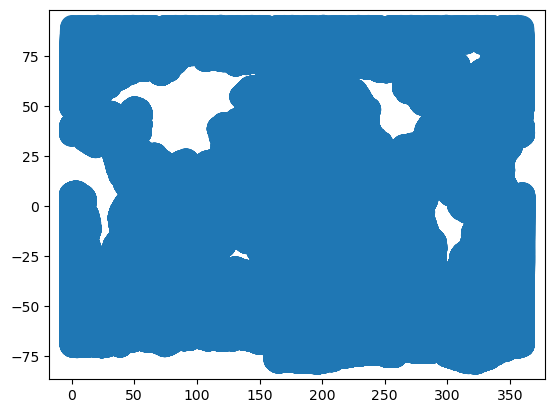

In [24]:
mask = ~ds.TLON.isnull()
plt.scatter(ds.TLON.data[mask], ds.TLAT.data[mask], ds.Tref.isel(time=0).data[mask])

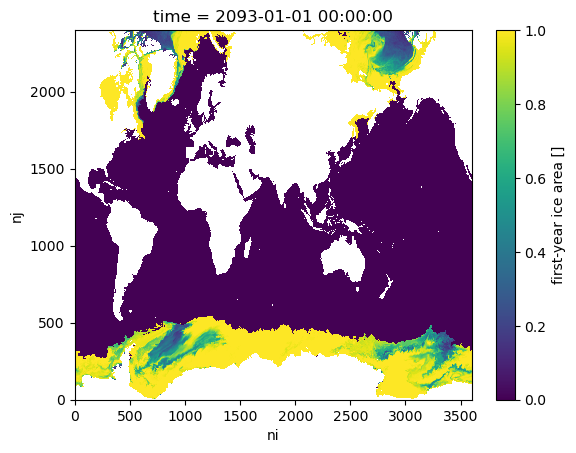

In [25]:
ds.FYarea.plot()

In [28]:
ds.close()

### clm

In [2]:
ds = xr.open_dataset("/home/jasperdj/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/lnd/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.clm2.h0.2092-12.nc")

In [6]:
for v in ds.variables:
    if 'lat' in ds[v].dims and 'lon' in ds[v].dims:
        if (ds[v]*ds.landmask).sum() == 0:
            print(v, ds[v].dims, ds[v].long_name)

topo ('lat', 'lon') grid cell topography
topodnsc ('lat', 'lon') normalized grid cell topography related to downscaling
EFLX_DYNBAL ('time', 'lat', 'lon') dynamic land cover change conversion energy flux
FLUXFMLND ('time', 'lat', 'lon') heat flux from rain to snow conversion
QFLX_ICE_DYNBAL ('time', 'lat', 'lon') ice dynamic land cover change conversion runoff flux
QFLX_LIQ_DYNBAL ('time', 'lat', 'lon') liq dynamic land cover change conversion runoff flux
QIRRIG ('time', 'lat', 'lon') water added through irrigation


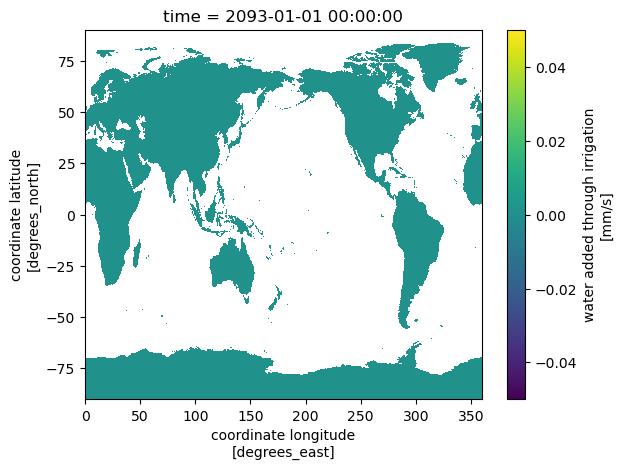

In [9]:
ds.QIRRIG.plot()

In [10]:
ds.close()

### pop.h

In [11]:
ds = xr.open_dataset("/home/jasperdj/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/ocn/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.pop.h.2092-12.nc")

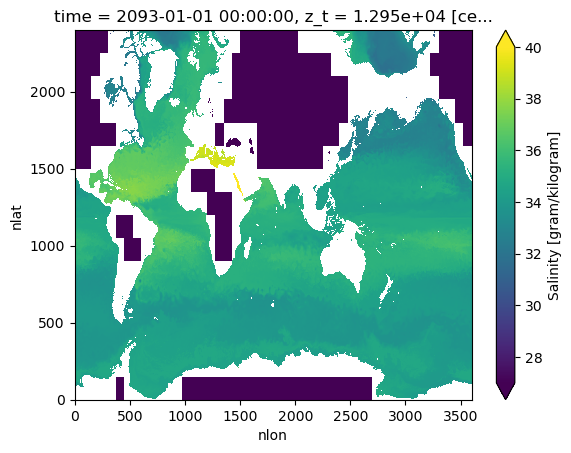

In [58]:
ds.SALT.isel(z_t=10).plot(vmin=27, vmax=40)

In [14]:
for v in ds:
    print(v,(ds[v]==0).sum().data)

time_bound 0
dz 0
dzw 0
KMT 1651858
KMU 1692698
REGION_MASK 1651858
UAREA 0
TAREA 0
HU 1692698
HT 1651858
DXU 0
DYU 0
DXT 0
DYT 0
HTN 0
HTE 0
HUS 0
HUW 0
ANGLE 4907030
ANGLET 4905000
days_in_norm_year 0
grav 0
omega 0
radius 0
cp_sw 0
sound 0
vonkar 0
cp_air 0
rho_air 0
rho_sw 0
rho_fw 0
stefan_boltzmann 0
latent_heat_vapor 0
latent_heat_fusion 0
ocn_ref_salinity 0
sea_ice_salinity 0
T0_Kelvin 0
salt_to_ppt 0
ppt_to_salt 0
mass_to_Sv 0
heat_to_PW 0
salt_to_Svppt 0
salt_to_mmday 0
momentum_factor 0
hflux_factor 0
fwflux_factor 0
salinity_factor 0
sflux_factor 0
nsurface_t 0
nsurface_u 0
UVEL 4100733
VVEL 4100733
KE 4100733
TEMP 0
SALT 0
SSH 0
SHF 0
SFWF 17262
TAUX 0
TAUY 0
IAGE 5413142
WVEL 0
UET 130809360
VNT 130847053
UES 130809360
VNS 130847053
PD 0
HMXL 0
XMXL 0
TMXL 0


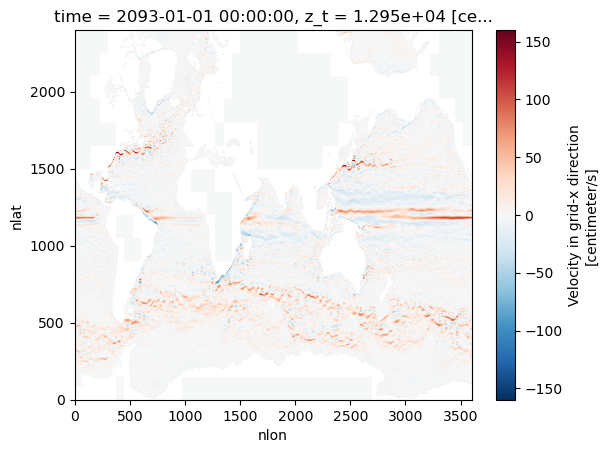

In [16]:
ds.UVEL.isel(z_t=10).plot()

In [59]:
ds.close()

In [60]:
ds=xr.open_dataset("/home/jasperdj/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/ocn/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.pop.h.nday1.2092-12-01.nc")

In [62]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:             (time: 31, d2: 2, z_t: 42, z_t_150m: 12, z_w: 42,
                         z_w_top: 42, z_w_bot: 42, nlat: 2400, nlon: 3600)
Coordinates:
  * time                (time) object 248B 2092-12-02 00:00:00 ... 2093-01-01...
  * z_t                 (z_t) float32 168B 500.6 1.507e+03 ... 5.875e+05
  * z_t_150m            (z_t_150m) float32 48B 500.6 1.507e+03 ... 1.49e+04
  * z_w                 (z_w) float32 168B 0.0 1.001e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 168B 0.0 1.001e+03 ... 5.75e+05
  * z_w_bot             (z_w_bot) float32 168B 1.001e+03 2.013e+03 ... 6e+05
    ULONG               (nlat, nlon) float64 69MB ...
    ULAT                (nlat, nlon) float64 69MB ...
    TLONG               (nlat, nlon) float64 69MB ...
    TLAT                (nlat, nlon) float64 69MB ...
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/51)
    time_bound          (time, d2) object 496B ...
    dz                  (z_t) float32 168B ...
    dzw                 (z_w) float32 168B ...
    KMT                 (nlat, nlon) float64 69MB ...
    KMU                 (nlat, nlon) float64 69MB ...
    REGION_MASK         (nlat, nlon) float64 69MB ...
    ...                  ...
    fwflux_factor       float64 8B ...
    salinity_factor     float64 8B ...
    sflux_factor        float64 8B ...
    nsurface_t          float64 8B ...
    nsurface_u          float64 8B ...
    SST                 (time, nlat, nlon) float32 1GB ...
Attributes:
    title:         hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 34115 2012-01-25 22:35:19Z njn01 $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2024-08-20 at 22:47:26.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  107120
    tavg_sum:      86399.99999999974

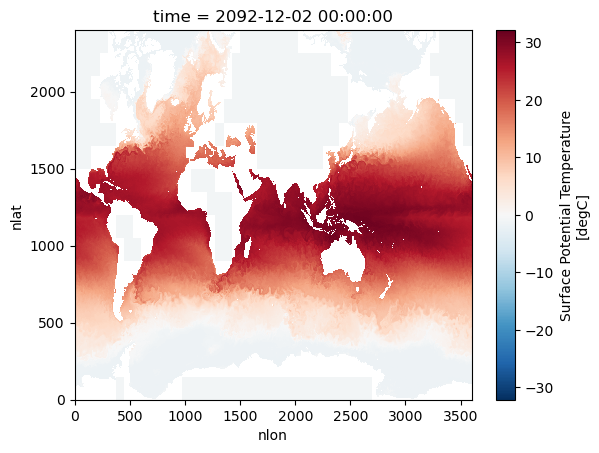

In [63]:
ds.SST.isel(time=0).plot()

In [64]:
ds.close()

In [65]:
ds = xr.open_dataset("/home/jasperdj/nwo2021025/archive/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001/ocn/hist/hres_b.e10.B2000_CAM5.f02_t12.started_2092-12.001.pop.hm.2092-12-01.nc")

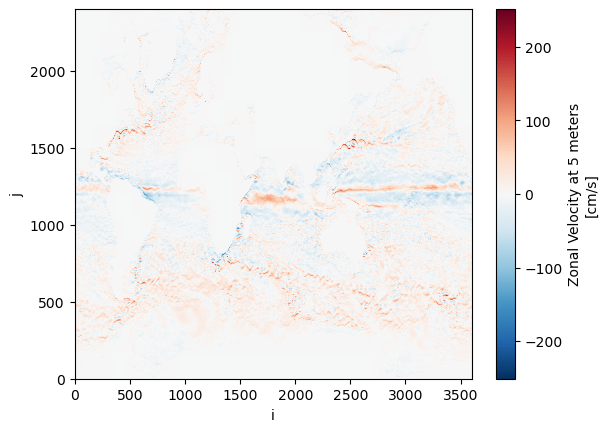

In [67]:
ds.UVEL_5m.plot()

In [68]:
ds.close()